In [4]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt 
import scipy

### Read in data

In [5]:
input_dir = "input_data/"

In [6]:
data=sc.read_csv("input_data/counts_lognorm.csv.gz", delimiter=" ", first_column_names=True)

In [7]:
anno_cells = pd.read_csv("input_data/anno_cells_norm.txt", sep = "\t") 
anno_samples = pd.read_csv("input_data/anno_samples_norm.txt", sep = "\t") 
anno_genes = pd.read_csv( "input_data/anno_genes_norm.txt", sep = "\t") 

/tmp/ipykernel_39862/1498478408.py:1: DtypeWarning: Columns (21,25,26,27,28,29,31,32,33,34,35,36,37,40,41,42,43,46,47,49,54,56,57,60,64,66,67,69) have mixed types. Specify dtype option on import or set low_memory=False.
  anno_cells = pd.read_csv("input_data/anno_cells_norm.txt", sep = "\t")


### Create adata object

In [8]:
data.X = scipy.sparse.csr_matrix(data.X)

In [9]:
data = sc.AnnData(data.T)

In [10]:
data.var = anno_genes
data.var_names=anno_genes['gene_symbol']
data.var_names = data.var_names.astype(str)
data.var.index = data.var.index.astype(str)
print("data.var_names[1:10]")
print(data.var_names[1:10])

data.var_names[1:10]
Index(['LINC01409', 'LINC01128', 'LINC00115', 'FAM41C', 'AL645608.2', 'NOC2L',
       'KLHL17', 'PLEKHN1', 'HES4'],
      dtype='object', name='gene_symbol')


In [11]:
data.obs_names=anno_cells['cell_ID']
print(data.obs_names[1:10])
data.obs = anno_cells
data.obs.index = data.obs.index.astype(str)

Index(['2020.09.15.AML0024.CATCAAGTCCGAGAAG',
       '2020.09.15.AML0024.CATCCACAGGGACCAT',
       '2020.09.15.AML0024.CCTCAACAGAGCAAGA',
       '2020.09.15.AML0024.CCTCAACAGTTCCATG',
       '2020.09.15.AML0024.CCTCAACGTAGAATAC',
       '2020.09.15.AML0024.CCTCAACGTTCTCCCA',
       '2020.09.15.AML0024.CCTCAACTCCGAACGC',
       '2020.09.15.AML0024.CCTCAACTCTAGTCAG',
       '2020.09.15.AML0024.CCTCACAAGACAGTCG'],
      dtype='object', name='cell_ID')


In [12]:
print(data.obs["sample_ID"].astype('str'))

0         AML-0024
1         AML-0024
2         AML-0024
3         AML-0024
4         AML-0024
           ...    
46697    healthy-5
46698    healthy-5
46699    healthy-5
46700    healthy-5
46701    healthy-5
Name: sample_ID, Length: 46702, dtype: object


### Arrange the samples in the correct order for plotting

In [13]:
annot = []

for sample_ID in data.obs["sample_ID"].astype('str'):
    
    if sample_ID=='healthy-1': #'healthy-1'
        annot=annot+['01_']
    elif sample_ID=='healthy-4': #'healthy-4'
        annot=annot+['02_']
    elif sample_ID=='healthy-4003': # 'healthy-4003'
        annot=annot+['03_']
    elif sample_ID=='healthy-3': # 'healthy-3'
        annot=annot+['04_']
    elif sample_ID=='healthy-2': #'healthy-2'
        annot=annot+['05_']
    elif sample_ID=='healthy-5':
        annot=annot+['06_']
    elif sample_ID=='AML-2123': #'AML-2123'
        annot=annot+['07_']
    elif sample_ID=='AML-0693': #'AML-0693'
        annot=annot+['08_']
    elif sample_ID=='AML-0160': #'AML-0160'
        annot=annot+['09_']
    elif sample_ID=='AML-3133': # 'AML-3133'
        annot=annot+['10_']
    elif sample_ID=='AML-4340': #'AML-4340'
        annot=annot+['11_']
    elif sample_ID=='AML-1371': #'AML-1371'
        annot=annot+['12_']
    else: 
        annot=annot+['13_'] #'AML-0024'
    

ordered=[]
ordered=annot+data.obs["sample_ID"].astype('str')
data.obs["ordered_sample_ID"] = ordered

print(data.obs["ordered_sample_ID"])

0         13_AML-0024
1         13_AML-0024
2         13_AML-0024
3         13_AML-0024
4         13_AML-0024
             ...     
46697    06_healthy-5
46698    06_healthy-5
46699    06_healthy-5
46700    06_healthy-5
46701    06_healthy-5
Name: ordered_sample_ID, Length: 46702, dtype: object


### Define plotting function

In [14]:
def plot_stacked(adata,cell_type_list,gene_list,ax
                ):
    
    subset_data=adata[adata.obs["cell_type"].isin(cell_type_list)]

    sc.pl.stacked_violin(subset_data
                       ,groupby="ordered_sample_ID"
                        ,var_names=genes_list,
                        swap_axes=True,
                        cmap="YlGnBu"
                        ,stripplot=True
                        ,jitter=True
                        ,return_fig=True
                         ,ax=ax
                        ).add_totals().show()

### Plot results

In [15]:
cell_type_list=["Mono"]

In [16]:
genes_list=['CALM1'
            ,'CALM3'
            ,'NRG1'
            ,'TNFSF14'
            ,'HP'
           ]

/work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/project/ladcol_011/con

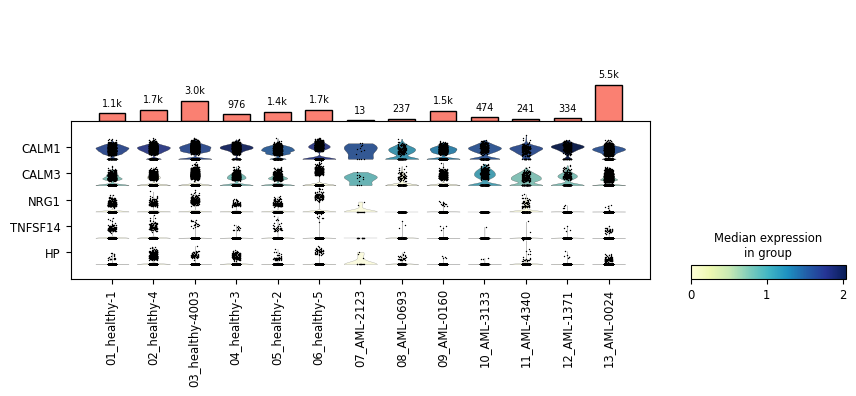

In [17]:
_, ax = plt.subplots(figsize=(10, 3.5))
plot_stacked(data,cell_type_list,genes_list,ax
            )

In [18]:
cell_type_list=["HSPC"]

In [19]:
genes_list=['PDE1B']

/work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/project/ladcol_011/conda_path/miniconda3/envs/community_paper/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/work/project/ladcol_011/con

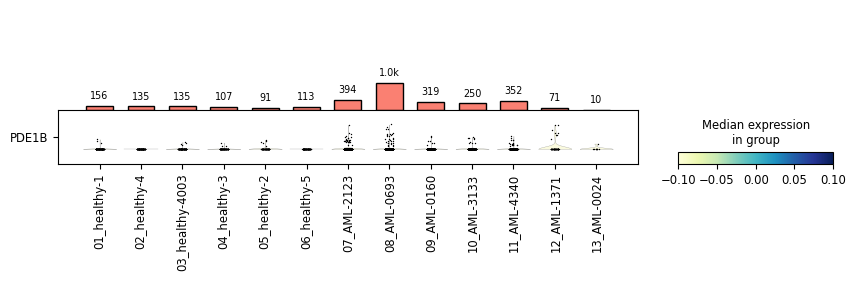

In [20]:
_, ax = plt.subplots(figsize=(10, 2))
plot_stacked(data,cell_type_list,genes_list,ax)